<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Customer Segmentation (Classification) </h1></center> 

<left><h2 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Problem Statement</h2></left>    

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Introduction</h3>

**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Dataset Features</h3>

**People:**

* `ID`: Customer's unique identifier
* `Year_Birth`: Customer's birth year
* `Education`: Customer's education level
* `Marital_Status`: Customer's marital status
* `Income`: Customer's yearly household income
* `Kidhome`: Number of children in customer's household
* `Teenhome`: Number of teenagers in customer's household
* `Dt_Customer`: Date of customer's enrollment with the company
* `Recency`: Number of days since customer's last purchase
* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

**Products:**

* `MntWines`: Amount spent on wine in last 2 years
* `MntFruits`: Amount spent on fruits in last 2 years
* `MntMeatProducts`: Amount spent on meat in last 2 years
* `MntFishProducts`: Amount spent on fish in last 2 years
* `MntSweetProducts`: Amount spent on sweets in last 2 years
* `MntGoldProds`: Amount spent on gold in last 2 years

**Promotion:**

* `NumDealsPurchases`: Number of purchases made with a discount
* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place:**

* `NumWebPurchases`: Number of purchases made through the company’s website
* `NumCatalogPurchases`: Number of purchases made using a catalogue
* `NumStorePurchases`: Number of purchases made directly in stores
* `NumWebVisitsMonth`: Number of visits to company’s website in the last month

In [1]:
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

<h3 style="color:red;text-align:centre;"> Handling Missing Values</h3>

In [2]:
data = pd.read_csv("customer_train.csv") 

Lets look wether there is any missing values

In [3]:
data

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,...,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,...,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,...,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,...,7,0,0,0,0,0,0,3,11,0


In [4]:
data.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64



The output of data.isnull().sum() indicates the number of missing values in each column of the DataFrame. In the provided output, the only column with missing values is Income, which has 17 missing values.All other columns have 0 missing values.

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
data.duplicated().sum()

0

<h3 style="color:red;text-align:centre;"> Featutre Engineering</h3>

In [9]:
# Transpose the DataFrame and check for duplicated columns
duplicate_columns = data.T.duplicated()

# Print names of duplicate columns
print("Duplicate columns:", data.columns[duplicate_columns].tolist())

Duplicate columns: ['Unnamed: 0']


In [10]:
print(data)

      Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status  \
0                0           0  5524        1957        S1         Lajang   
1                1           1  2174        1954        S1         Lajang   
2                2           2  4141        1965        S1    Bertunangan   
3                3           3  6182        1984        S1    Bertunangan   
4                4           4  5324        1981        S3        Menikah   
...            ...         ...   ...         ...       ...            ...   
1675          1675        1675  4712        1991        D3    Bertunangan   
1676          1676        1676  1170        1975        S1        Menikah   
1677          1677        1677  6347        1979       SMA         Lajang   
1678          1678        1678  4065        1976        S3        Menikah   
1679          1679        1679  8230        1980        S1        Menikah   

          Income  Kidhome  Teenhome Dt_Customer  ...  NumWebVisitsMonth  \


In [11]:
# Define a function to delete a column
def delete_column(df, column_name):
    if column_name in df.columns:
        del df[column_name]
        return df
    else:
        print(f"Column '{column_name}' not found in DataFrame.")
        return df


# Delete column 'Unnamed'
data = delete_column(data, 'Unnamed: 0')

# Print the DataFrame after deleting the column
print(data)


      Unnamed: 0.1    ID  Year_Birth Education Marital_Status      Income  \
0                0  5524        1957        S1         Lajang  58138000.0   
1                1  2174        1954        S1         Lajang  46344000.0   
2                2  4141        1965        S1    Bertunangan  71613000.0   
3                3  6182        1984        S1    Bertunangan  26646000.0   
4                4  5324        1981        S3        Menikah  58293000.0   
...            ...   ...         ...       ...            ...         ...   
1675          1675  4712        1991        D3    Bertunangan  20193000.0   
1676          1676  1170        1975        S1        Menikah  27573000.0   
1677          1677  6347        1979       SMA         Lajang  15862000.0   
1678          1678  4065        1976        S3        Menikah  49544000.0   
1679          1679  8230        1980        S1        Menikah  33228000.0   

      Kidhome  Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  \
0  

In [12]:
# Rename the unnamed column to 'SNo'
data.columns.values[0] = 'SNo'
print(data.head())

   SNo    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0    0  5524        1957        S1         Lajang  58138000.0        0   
1    1  2174        1954        S1         Lajang  46344000.0        1   
2    2  4141        1965        S1    Bertunangan  71613000.0        0   
3    3  6182        1984        S1    Bertunangan  26646000.0        1   
4    4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  AcceptedCmp3  \
0         0  04-09-2012       58  ...                  7             0   
1         1  08-03-2014       38  ...                  5             0   
2         0  21-08-2013       26  ...                  4             0   
3         0  10-02-2014       26  ...                  6             0   
4         0  19-01-2014       94  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0          

In [19]:
data.dtypes

SNo                      int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime

In [22]:

# Convert 'Dt_Customer' column to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
print(data.head())

   SNo    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0    0  5524        1957        S1         Lajang  58138000.0        0   
1    1  2174        1954        S1         Lajang  46344000.0        1   
2    2  4141        1965        S1    Bertunangan  71613000.0        0   
3    3  6182        1984        S1    Bertunangan  26646000.0        1   
4    4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  AcceptedCmp3  \
0         0  2012-09-04       58  ...                  7             0   
1         1  2014-03-08       38  ...                  5             0   
2         0  2013-08-21       26  ...                  4             0   
3         0  2014-02-10       26  ...                  6             0   
4         0  2014-01-19       94  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0          

In [23]:
data.dtypes

SNo                             int64
ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain    

Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

In [25]:

data['Age'] = 2015 - data['Year_Birth']

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.



In [26]:
data['Spent'] = data['MntCoke'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']


Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

In [27]:
data['Children'] = data['Kidhome'] + data['Teenhome']

To get further clarity of household, Creating feature indicating "Family_Size"

***Dropping some of the redundant features***

In [28]:
to_drop = ['Z_CostContact', 'Z_Revenue']
data = data.drop(to_drop, axis=1)

In [29]:

print(data)

       SNo    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0        0  5524        1957        S1         Lajang  58138000.0        0   
1        1  2174        1954        S1         Lajang  46344000.0        1   
2        2  4141        1965        S1    Bertunangan  71613000.0        0   
3        3  6182        1984        S1    Bertunangan  26646000.0        1   
4        4  5324        1981        S3        Menikah  58293000.0        1   
...    ...   ...         ...       ...            ...         ...      ...   
1675  1675  4712        1991        D3    Bertunangan  20193000.0        0   
1676  1676  1170        1975        S1        Menikah  27573000.0        1   
1677  1677  6347        1979       SMA         Lajang  15862000.0        1   
1678  1678  4065        1976        S3        Menikah  49544000.0        1   
1679  1679  8230        1980        S1        Menikah  33228000.0        1   

      Teenhome Dt_Customer  Recency  ...  AcceptedCmp3  Accepte

In [30]:
data.head(3)

,SNo,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,...,0,0,0,0,0,0,1,58,1617000,0
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,...,0,0,0,0,0,0,0,61,27000,2
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,0,0,0,0,0,0,0,50,776000,0



<h2 style="color:red;text-align:left;">Data Analysis and Visualization </h2>

In [31]:
data.shape

(1663, 31)

There are 1663 cutomers and 33 features in the dataset.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1663 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SNo                  1663 non-null   int64         
 1   ID                   1663 non-null   int64         
 2   Year_Birth           1663 non-null   int64         
 3   Education            1663 non-null   object        
 4   Marital_Status       1663 non-null   object        
 5   Income               1663 non-null   float64       
 6   Kidhome              1663 non-null   int64         
 7   Teenhome             1663 non-null   int64         
 8   Dt_Customer          1663 non-null   datetime64[ns]
 9   Recency              1663 non-null   int64         
 10  MntCoke              1663 non-null   int64         
 11  MntFruits            1663 non-null   int64         
 12  MntMeatProducts      1663 non-null   int64         
 13  MntFishProducts      1663 non-null   i

In [33]:
data.describe()

,SNo,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children
count,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1663.000000,1663,1663.000000,1.663000e+03,1663.000000,...,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000
mean,843.901383,5547.541191,1968.849068,5.201434e+07,0.449188,0.499098,2013-07-11 01:37:50.835838720,49.061335,3.060469e+05,25978.352375,...,0.072159,0.073963,0.069753,0.061936,0.012026,0.010222,0.145520,46.150932,6.059008e+05,0.948286
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000e+03,0.000000
25%,428.500000,2814.500000,1960.000000,3.568800e+07,0.000000,0.000000,2013-01-17 00:00:00,24.000000,2.400000e+04,1000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,6.950000e+04,0.000000
50%,844.000000,5376.000000,1970.000000,5.125000e+07,0.000000,0.000000,2013-07-11 00:00:00,50.000000,1.730000e+05,8000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,3.930000e+05,1.000000
75%,1259.500000,8369.500000,1977.000000,6.812200e+07,1.000000,1.000000,2013-12-29 00:00:00,74.000000,4.990000e+05,32000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.043500e+06,1.000000
max,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1.492000e+06,199000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,2.525000e+06,3.000000
std,482.471617,3240.106517,12.037325,2.148248e+07,0.544890,0.549449,NaN,28.914182,3.392420e+05,39576.041604,...,0.258828,0.261789,0.254808,0.241112,0.109037,0.100618,0.352731,12.037325,6.027183e+05,0.759834


<h4 style="color:red;text-align:left;">Visualization </h4>

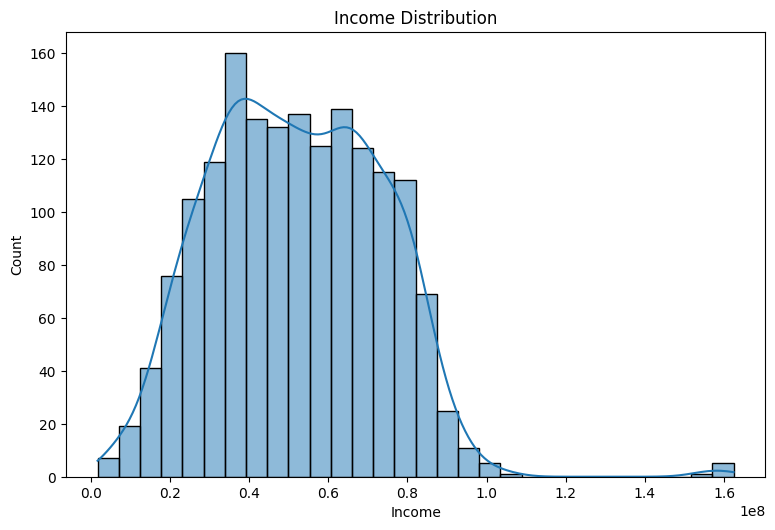

In [42]:


# Distribution Plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['Income'], kde=True)
plt.title('Income Distribution')
plt.tight_layout()
plt.show()



Income Distribution: Shows most incomes are concentrated in the lower range with a few high outliers.

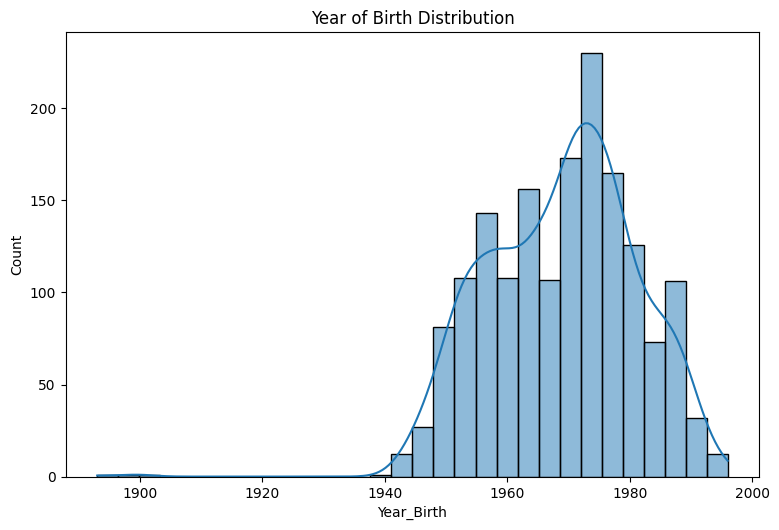

In [43]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 2)
sns.histplot(data['Year_Birth'], kde=True, bins=30)
plt.title('Year of Birth Distribution')
plt.tight_layout()
plt.show()

Year of Birth Distribution: Most customers were born between 1960 and 1980.

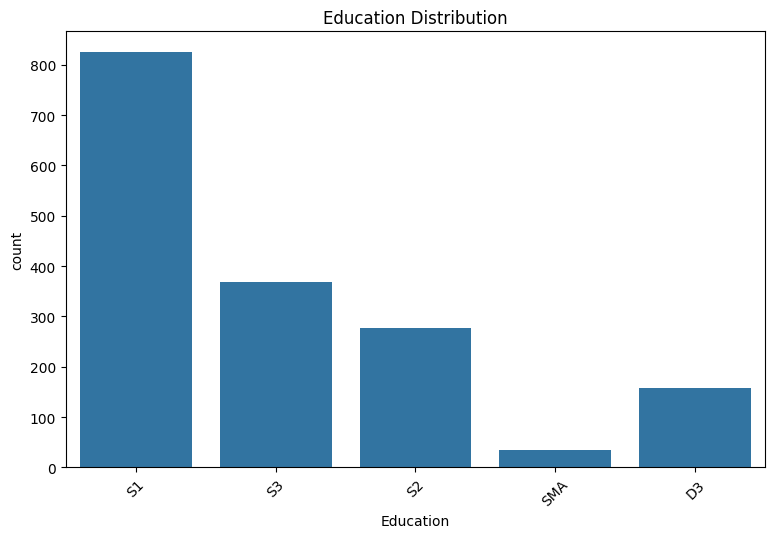

In [41]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Education')
plt.title('Education Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Education Distribution: Majority have a Bachelor's degree (S1).


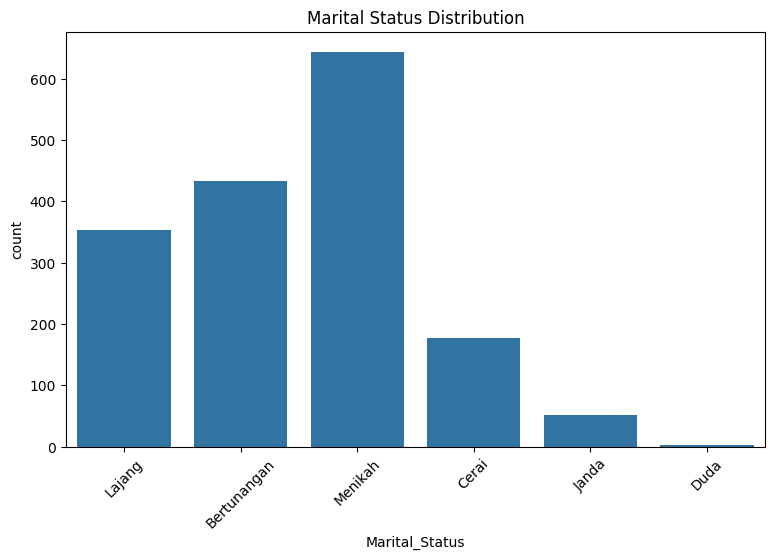

In [38]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
sns.countplot(data=data, x='Marital_Status')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Marital Status Distribution: Most customers are Married (Menikah) or Single (Lajang).


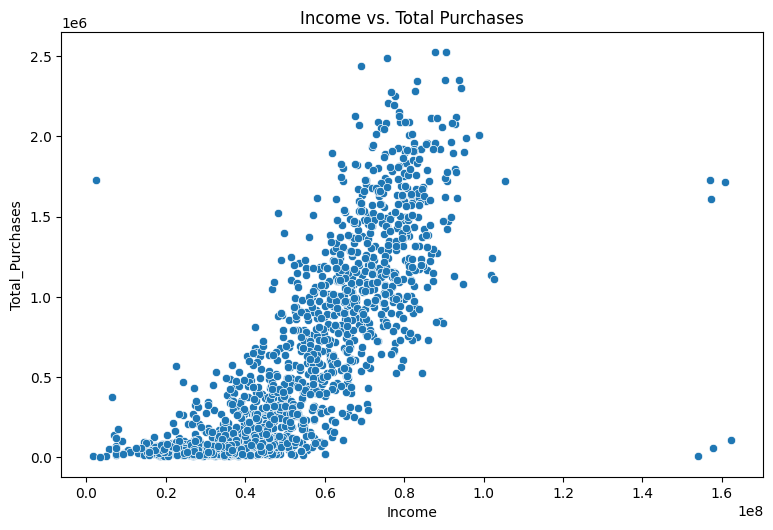

In [47]:
# Further Visualizations
plt.figure(figsize=(15, 10))

# Relationship between Income and Total Purchases
data['Total_Purchases'] = (data['MntCoke'] + data['MntFruits'] + 
                                    data['MntMeatProducts'] + data['MntFishProducts'] + 
                                    data['MntSweetProducts'] + data['MntGoldProds'])

plt.subplot(2, 2, 1)
sns.scatterplot(x='Income', y='Total_Purchases', data=data)
plt.title('Income vs. Total Purchases')
plt.tight_layout()
plt.show()


Output:
Income vs. Total Purchases:
Scatter plot showing a positive correlation between income and total purchases.

Explanation:
Higher income tends to correlate with higher total purchases, with some variability.


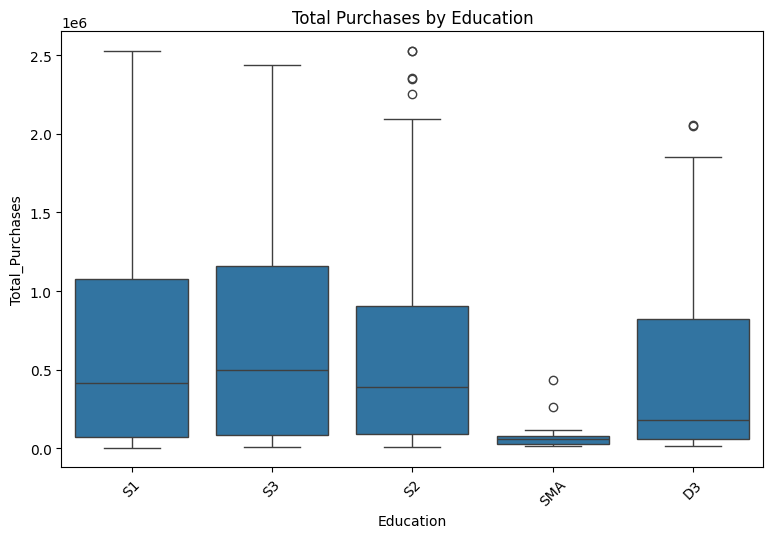

In [46]:
# Further Visualizations
plt.figure(figsize=(15, 10))


# Distribution of Total Purchases by Education
plt.subplot(2, 2, 2)
sns.boxplot(x='Education', y='Total_Purchases', data=data)
plt.title('Total Purchases by Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
Output:
Total Purchases by Education:
Box plot indicating customers with higher education levels tend to have higher total purchases.

Explanation:
Total Purchases by Education: Higher education levels generally correlate with higher purchasing.


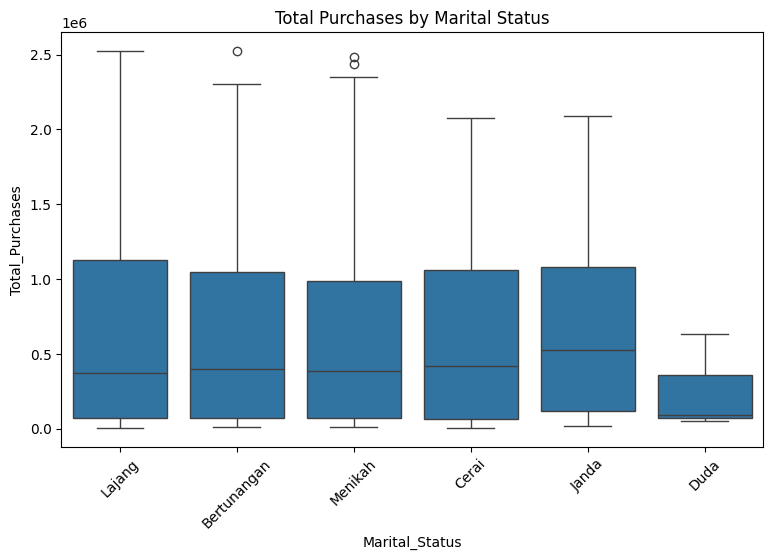

In [48]:
# Further Visualizations
plt.figure(figsize=(15, 10))



# Distribution of Total Purchases by Marital Status
plt.subplot(2, 2, 3)
sns.boxplot(x='Marital_Status', y='Total_Purchases', data=data)
plt.title('Total Purchases by Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
Output:
Total Purchases by Marital Status: 
Box plot showing Engaged and Married customers have higher median total purchases.

Explanation:
Certain marital statuses are associated with higher purchasing behavior.


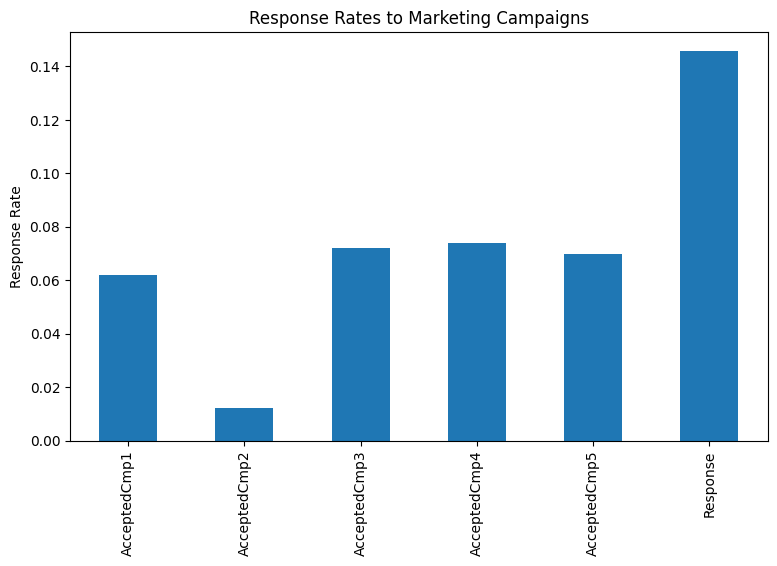

In [49]:
# Further Visualizations
plt.figure(figsize=(15, 10))


# Response Rates to Marketing Campaigns
response_rates = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()
plt.subplot(2, 2, 4)
response_rates.plot(kind='bar')
plt.title('Response Rates to Marketing Campaigns')
plt.ylabel('Response Rate')

plt.tight_layout()
plt.show()


In [ ]:
Output:
Response Rates to Marketing Campaigns: 
Bar chart showing response rates to different campaigns, with AcceptedCmp3 having the highest response rate.

Explanation:
Provides insight into which campaigns were more successful.

***Correlation Matrix***

   SNo    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0    0  5524        1957        S1         Lajang  58138000.0        0   
1    1  2174        1954        S1         Lajang  46344000.0        1   
2    2  4141        1965        S1    Bertunangan  71613000.0        0   
3    3  6182        1984        S1    Bertunangan  26646000.0        1   
4    4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  ...  AcceptedCmp4  AcceptedCmp5  \
0         0  2012-09-04       58  ...             0             0   
1         1  2014-03-08       38  ...             0             0   
2         0  2013-08-21       26  ...             0             0   
3         0  2014-02-10       26  ...             0             0   
4         0  2014-01-19       94  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Age    Spent  Children  \
0             0             0         0         1   58  1617000

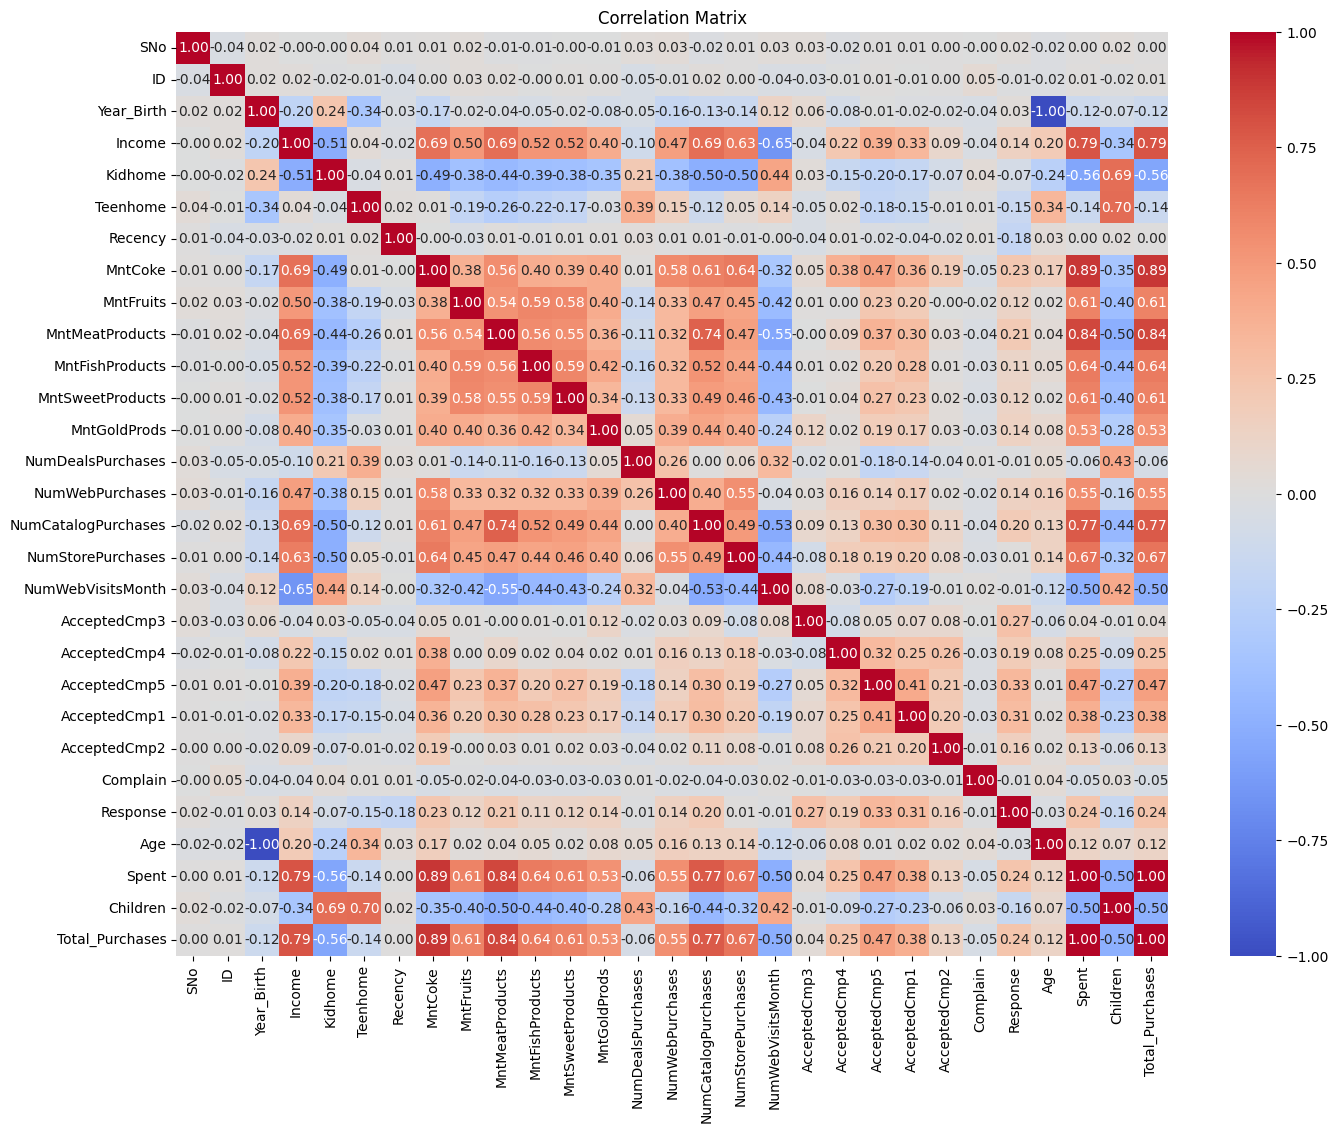

In [50]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Ensure the data is loaded correctly
print(data.head())

# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


***Outliers Detection***

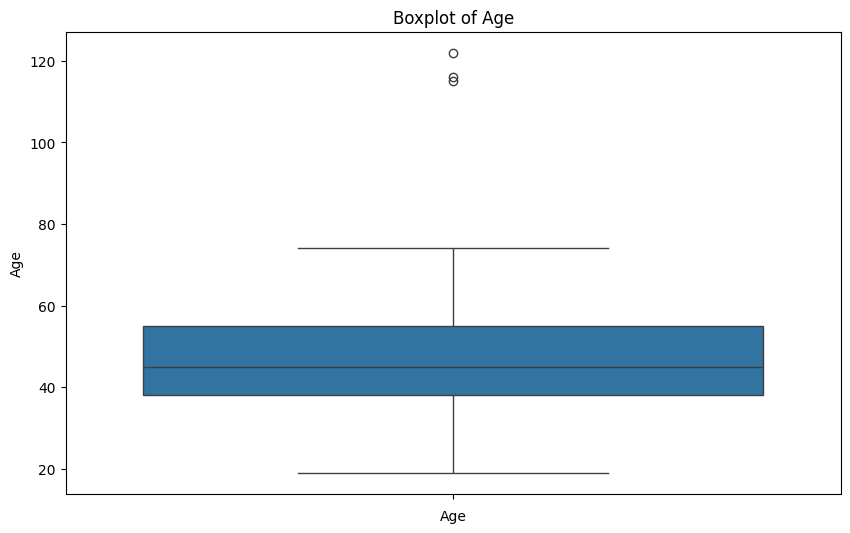

In [33]:

plt.figure(figsize=(10, 6))
sns.boxplot(data['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()




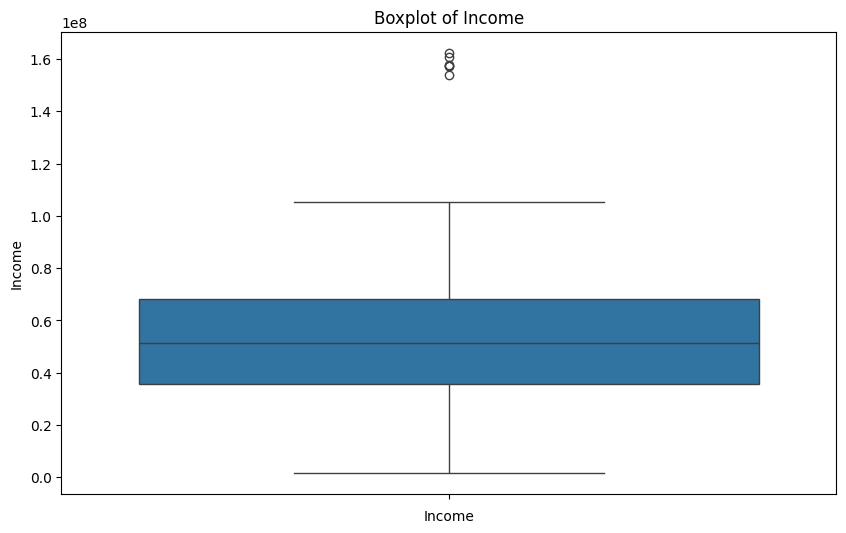

In [34]:

plt.figure(figsize=(10, 6))
sns.boxplot(data['Income'])
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.show()


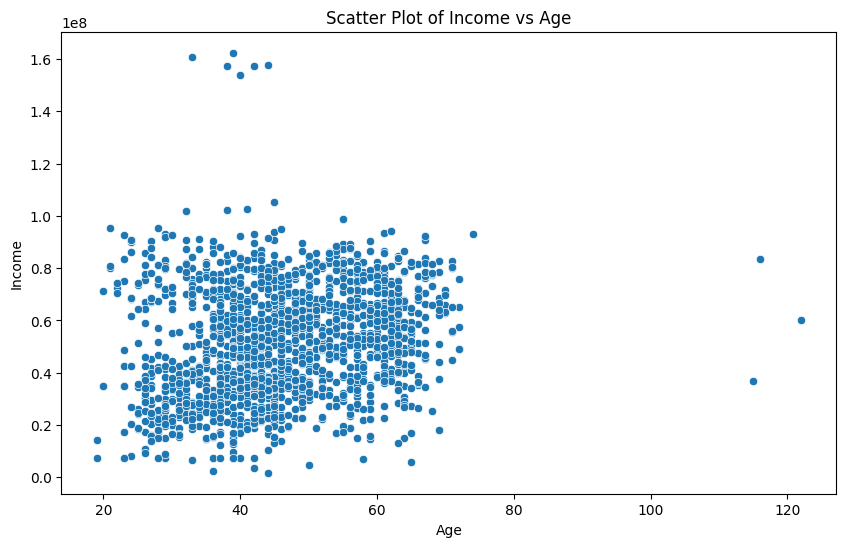

In [35]:
# Scatter Plot for Income vs Age (for example)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Income'])
plt.title('Scatter Plot of Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

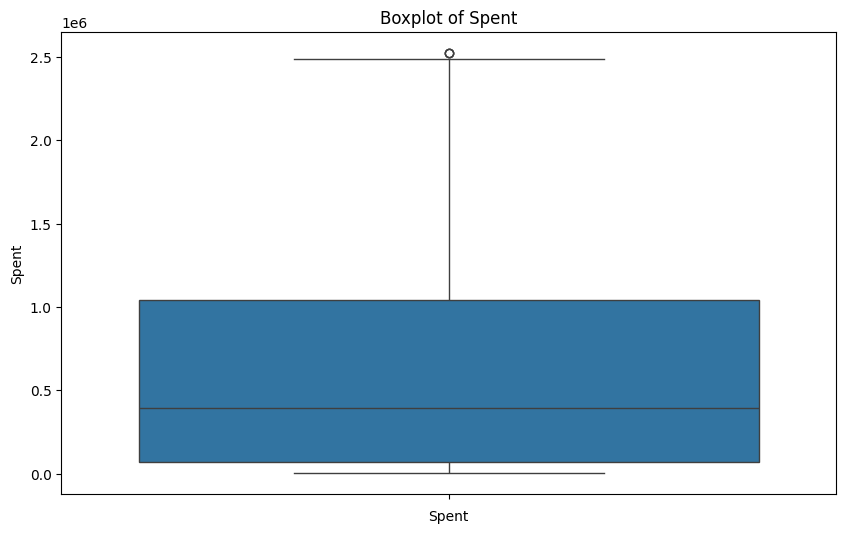

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['Spent'])
plt.title('Boxplot of Spent')
plt.xlabel('Spent')
plt.show()

<h3 style="color:red;text-align:left;"> Categorical Variable Encoding</h3>

In [37]:
print(data.head())



   SNo    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0    0  5524        1957        S1         Lajang  58138000.0        0   
1    1  2174        1954        S1         Lajang  46344000.0        1   
2    2  4141        1965        S1    Bertunangan  71613000.0        0   
3    3  6182        1984        S1    Bertunangan  26646000.0        1   
4    4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  ...  AcceptedCmp4  AcceptedCmp5  \
0         0  2012-09-04       58  ...             0             0   
1         1  2014-03-08       38  ...             0             0   
2         0  2013-08-21       26  ...             0             0   
3         0  2014-02-10       26  ...             0             0   
4         0  2014-01-19       94  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Age    Spent  Children  \
0             0             0         0         1   58  1617000

In [55]:
import pandas as pd


# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the identified categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: ['Education', 'Marital_Status']


In [56]:


# Identify the categorical columns to be encoded
categorical_columns = ['Education', 'Marital_Status']

# Perform one-hot encoding on the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Save the encoded dataset to a new CSV file
encoded_file_path = 'customer_train_encoded.csv'  # Change this to your desired save path
data_encoded.to_csv(encoded_file_path, index=False)

print(f"Encoded dataset saved to {encoded_file_path}")


Encoded dataset saved to customer_train_encoded.csv


In [57]:
# Load and display the first few rows of the encoded dataset
encoded_data = pd.read_csv(encoded_file_path)
print(encoded_data.head())


   SNo    ID  Year_Birth      Income  Kidhome  Teenhome Dt_Customer  Recency  \
0    0  5524        1957  58138000.0        0         0  2012-09-04       58   
1    1  2174        1954  46344000.0        1         1  2014-03-08       38   
2    2  4141        1965  71613000.0        0         0  2013-08-21       26   
3    3  6182        1984  26646000.0        1         0  2014-02-10       26   
4    4  5324        1981  58293000.0        1         0  2014-01-19       94   

   MntCoke  MntFruits  ...  Total_Purchases  Education_S1  Education_S2  \
0   635000      88000  ...          1617000          True         False   
1    11000       1000  ...            27000          True         False   
2   426000      49000  ...           776000          True         False   
3    11000       4000  ...            53000          True         False   
4   173000      43000  ...           422000         False         False   

   Education_S3  Education_SMA  Marital_Status_Cerai  Marital_Status

<h3 style="color:red;text-align:centre;"> FEATURE SCALING</h3>

In this section, numerical features are scaled.

StandardScaler = $\frac{x-\mu}{s}$

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify the columns to be scaled (all numerical columns)
numerical_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Now you can use the scaled data for analysis or modeling within the current session


In [59]:
print(data_encoded.head(2))

        SNo        ID  Year_Birth    Income   Kidhome  Teenhome Dt_Customer  \
0 -1.749647 -0.007268   -0.984657  0.285139 -0.824613 -0.908634  2012-09-04   
1 -1.747574 -1.041495   -1.233956 -0.264031  1.011172  0.911918  2014-03-08   

    Recency   MntCoke  MntFruits  ...  Total_Purchases  Education_S1  \
0  0.309238  0.969963   1.567623  ...         1.678070          True   
1 -0.382672 -0.869986  -0.631338  ...        -0.960772          True   

   Education_S2  Education_S3  Education_SMA  Marital_Status_Cerai  \
0         False         False          False                 False   
1         False         False          False                 False   

   Marital_Status_Duda  Marital_Status_Janda  Marital_Status_Lajang  \
0                False                 False                   True   
1                False                 False                   True   

   Marital_Status_Menikah  
0                   False  
1                   False  

[2 rows x 39 columns]


In [60]:
print(data_encoded.describe())

                SNo            ID    Year_Birth        Income       Kidhome  \
count  1.663000e+03  1.663000e+03  1.663000e+03  1.663000e+03  1.663000e+03   
mean  -6.836250e-17  1.345887e-16 -4.225657e-15  5.287412e-17  6.408984e-18   
min   -1.749647e+00 -1.712663e+00 -6.303052e+00 -2.341418e+00 -8.246128e-01   
25%   -8.612451e-01 -8.437572e-01 -7.353569e-01 -7.602128e-01 -8.246128e-01   
50%    2.044610e-04 -5.295900e-02  9.564237e-02 -3.559055e-02 -8.246128e-01   
75%    8.616541e-01  8.712083e-01  6.773419e-01  7.500299e-01  1.011172e+00   
max    1.731397e+00  1.742275e+00  2.256240e+00  5.139810e+00  2.846956e+00   
std    1.000301e+00  1.000301e+00  1.000301e+00  1.000301e+00  1.000301e+00   

           Teenhome                    Dt_Customer       Recency  \
count  1.663000e+03                           1663  1.663000e+03   
mean   6.836250e-17  2013-07-11 01:37:50.835838720  1.068164e-17   
min   -9.086337e-01            2012-07-30 00:00:00 -1.697302e+00   
25%   -9.086337e

<h3 style="color:red;text-align:centre;"> DIMENSIONALITY REDUCTION</h3>

In [61]:
to_drop = ['Dt_Customer' ]
data = data.drop(to_drop, axis=1)

In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#  Apply PCA
pca = PCA(n_components=3)  # Reduce to 2 principal components; adjust as needed
pca.fit(data_encoded[numerical_columns])


PCA(n_components=3)

In [63]:
W = pca.components_.T
W

array([[-0.00113943,  0.01143468,  0.04022426],
       [ 0.00607234, -0.02688387, -0.03617952],
       [-0.05440587, -0.45600596,  0.13772759],
       [ 0.28144893,  0.09516034, -0.0304436 ],
       [-0.22178619, -0.05692952,  0.15728937],
       [-0.06110349,  0.47499759,  0.03389149],
       [-0.00515865,  0.0484086 , -0.10540143],
       [ 0.27055265,  0.12981106,  0.20813223],
       [ 0.22416361, -0.08648505, -0.16183028],
       [ 0.27485793, -0.08600915, -0.05884415],
       [ 0.23392598, -0.08698621, -0.16369199],
       [ 0.22710656, -0.08124645, -0.13961602],
       [ 0.18671055,  0.04745965, -0.02211128],
       [-0.04907566,  0.30201722,  0.15723123],
       [ 0.18481113,  0.22627892,  0.10372138],
       [ 0.26937818,  0.02132378, -0.01913043],
       [ 0.2382637 ,  0.13734955, -0.05782563],
       [-0.20687906,  0.07182324,  0.25704665],
       [ 0.00948823, -0.07149755,  0.21548376],
       [ 0.08361017,  0.08382542,  0.38341365],
       [ 0.16234401, -0.09299478,  0.317

In [64]:
pca.explained_variance_
     

array([8.90921784, 2.69076015, 1.93347807])

In [65]:
pca.explained_variance_ratio_

array([0.30702967, 0.09272904, 0.06663157])

In [66]:
pd.DataFrame(pca.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

,Explained Variability
1,0.307030
2,0.092729
3,0.066632


In [67]:
pca.explained_variance_ratio_.cumsum()

array([0.30702967, 0.39975871, 0.46639028])

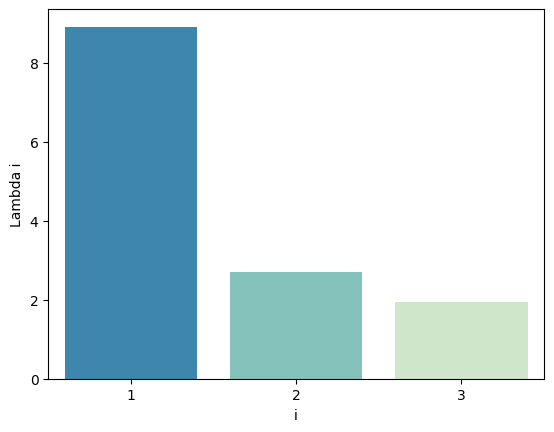

In [68]:
sns.barplot(x = list(range(1,4)), y = pca.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [69]:
data_PCA = pd.DataFrame(pca.transform(data_encoded[numerical_columns]), columns=(['col1', 'col2', 'col3']))

In [70]:
data_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1663.0,8.331680e-17,2.984831,-4.767750,-2.664969,-0.861957,2.442689,8.881336
col2,1663.0,7.156699e-17,1.640354,-3.721083,-1.347770,0.024417,1.267492,5.585465
col3,1663.0,-3.418125e-17,1.390510,-3.255297,-0.772830,-0.165467,0.429635,8.130221


<h3 style="color:red;text-align:centre;"> CLASSIFICATION</h3>

In [71]:
features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
target = 'Response'

# Select features and target
selected_data = data_encoded[features + [target]]  # Concatenate lists to include 'Response'

print(selected_data.head())


   AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0     -0.256955     -0.110331     -0.278874     -0.282613     -0.273832   
1     -0.256955     -0.110331     -0.278874     -0.282613     -0.273832   
2     -0.256955     -0.110331     -0.278874     -0.282613     -0.273832   
3     -0.256955     -0.110331     -0.278874     -0.282613     -0.273832   
4     -0.256955     -0.110331     -0.278874     -0.282613     -0.273832   

   Response  
0  2.423201  
1 -0.412677  
2 -0.412677  
3 -0.412677  
4 -0.412677  


In [72]:
print("\nData Types:")
print(selected_data.dtypes)


Data Types:
AcceptedCmp1    float64
AcceptedCmp2    float64
AcceptedCmp3    float64
AcceptedCmp4    float64
AcceptedCmp5    float64
Response        float64
dtype: object


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
target = 'Response'

# Ensure Response is categorical (e.g., binary)
data_encoded['Response'] = data_encoded['Response'].astype(int)

# Split the data into training and testing sets
X = data_encoded[features]
y = data_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8559
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       284
           2       0.53      0.18      0.27        49

    accuracy                           0.86       333
   macro avg       0.70      0.58      0.60       333
weighted avg       0.82      0.86      0.82       333



In [74]:
from sklearn.metrics import mean_squared_error


# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse:.4f}")




Mean Squared Error: 0.5766


In [75]:
from sklearn.tree import DecisionTreeClassifier


# Create a decision tree classifier model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8558558558558559
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       284
           2       0.54      0.14      0.23        49

    accuracy                           0.86       333
   macro avg       0.70      0.56      0.57       333
weighted avg       0.82      0.86      0.82       333



In [76]:
from sklearn.ensemble import RandomForestClassifier
 


# Create a Random Forest classifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8558558558558559
